## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
from google.colab import drive
import pandas as pd
import seaborn as sns
from keras.utils import to_categorical    
import numpy as np
from keras import backend as k


In [124]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
k.clear_session()

In [0]:
project_path = "/content/drive/My Drive/GL/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
with ZipFile(project_path+'test.zip','r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
with ZipFile(project_path+'sample_submission.csv.zip','r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
with ZipFile(project_path+'labels.csv.zip','r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
labels=pd.read_csv('labels.csv')

In [132]:
labels.sample(10)

,id,breed
9389,eb921996f4cc09c35970d0c18a415a2f,bloodhound
8038,c8edd4f20e6fee048cd1a61067a1a4a3,great_dane
8729,daf558fa86ca539f975a8af9e2f6ae11,flat-coated_retriever
2212,3774d4950b5b604fa3aa3de74e6c1c85,miniature_poodle
7930,c648c75a66ac06d71242e46e628ad3cc,basenji
7471,bbb2ba350d76eda23bb65ebd4f2c9925,black-and-tan_coonhound
3705,5c5d99a4118647edcd81b8642df9922d,maltese_dog
6257,9e13beffb5b1aeda1aceeec82648b058,shetland_sheepdog
612,0f015731185a2308c1a85eed4e8ad728,english_foxhound
2400,3baec795904e1eed9c6038998bb5219d,labrador_retriever


### Print the count of each category of Dogs given in the dataset



In [133]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

### Get one-hot encodings of labels

In [0]:
encoded_labels=pd.get_dummies(labels['breed'])

In [135]:
encoded_labels.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
from tqdm import tqdm
import cv2
x_train=[]
y_train=[]
img_rows=128
img_cols=128


In [137]:
for f,img in tqdm(labels.values):
  train_img=cv2.imread('./train/{}.jpg'.format(f),1)
  train_image_resize=cv2.resize(train_img,(img_rows,img_cols))
  x_train.append(train_image_resize)
  y_train.append(img)

100%|██████████| 10222/10222 [00:31<00:00, 323.22it/s]


In [138]:
y_train[0]

'boston_bull'

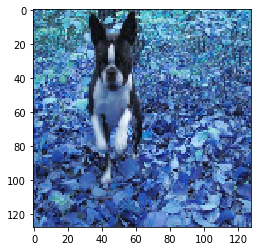

In [139]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_train=np.array(x_train)/255

In [141]:
x_train.shape

(10222, 128, 128, 3)

In [0]:

x_train[0].shape
x_train=x_train.reshape(x_train.shape[0],128,128,3)

In [143]:
x_train.shape

(10222, 128, 128, 3)

In [0]:
dummy=pd.get_dummies(y_train)

In [0]:
y_train=dummy

In [0]:
y_train=np.array(y_train)

In [147]:
y_train.shape

(10222, 120)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [148]:
from sklearn.model_selection import train_test_split
x_train2, x_val, y_train2, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)
print (len(x_train2))
print (len(x_val))

8177
2045


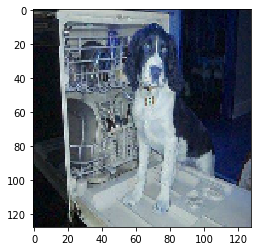

In [149]:
plt.imshow(x_train2[0])

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
test_img=pd.read_csv("sample_submission.csv")['id']

In [151]:
test_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [152]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:14<00:00, 695.79it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_feature=np.array(x_test_feature)/255

In [154]:
x_test_feature[0].shape

(128, 128)

In [155]:
x_test_feature.shape

(10357, 128, 128)

In [0]:
x_test_feature=x_test_feature.reshape((x_test_feature.shape[0],128,128,1))

In [157]:
x_test_feature.shape

(10357, 128, 128, 1)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from keras.models import Sequential, Model 
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

In [159]:
model = Sequential()

model.add(Convolution2D(5,3,3,input_shape=(128,128,3)))

model.add(Convolution2D(3,3,3))
model.add(Flatten())
model.add(Dense(256,activation="relu"))

#Prediction Layer
model.add(Dense(120,activation="softmax"))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(5, (3, 3), input_shape=(128, 128,...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3))`
  """


In [0]:
  # Loss and Optimizer
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [161]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 5)       140       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 3)       138       
_________________________________________________________________
flatten_1 (Flatten)          (None, 46128)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               11809024  
_________________________________________________________________
dense_2 (Dense)              (None, 120)               30840     
Total params: 11,840,142
Trainable params: 11,840,142
Non-trainable params: 0
_________________________________________________________________


### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
batch_size=128
epochs=10

In [163]:
model.fit(x_train2,y_train2,batch_size=batch_size,epochs=epochs)

Epoch 1/10
8177/8177 [==============================] - 4s 455us/step - loss: 5.3741 - acc: 0.0109
Epoch 2/10
8177/8177 [==============================] - 3s 393us/step - loss: 4.7609 - acc: 0.0174
Epoch 3/10
8177/8177 [==============================] - 3s 382us/step - loss: 4.6133 - acc: 0.0418
Epoch 4/10
8177/8177 [==============================] - 3s 391us/step - loss: 3.8860 - acc: 0.1874
Epoch 5/10
8177/8177 [==============================] - 3s 391us/step - loss: 2.1437 - acc: 0.5678
Epoch 6/10
8177/8177 [==============================] - 3s 389us/step - loss: 0.5713 - acc: 0.9023
Epoch 7/10
8177/8177 [==============================] - 3s 393us/step - loss: 0.0864 - acc: 0.9945
Epoch 8/10
8177/8177 [==============================] - 3s 390us/step - loss: 0.0234 - acc: 0.9989
Epoch 9/10
8177/8177 [==============================] - 3s 392us/step - loss: 0.0148 - acc: 0.9994
Epoch 10/10
8177/8177 [==============================] - 3s 394us/step - loss: 0.0140 - acc: 0.9993


#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator


In [0]:
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.43,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.23,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

# Prepare the generator
datagen.fit(x_train2)

[]

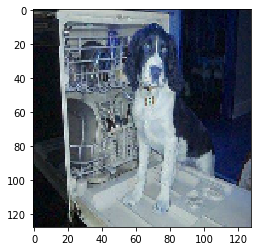

In [166]:
plt.imshow(x_train2[0].squeeze(), cmap='gray')
plt.plot()

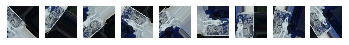

In [167]:
gen = datagen.flow(x_train2[:1], batch_size=1)
for i in range(1, 10):
    plt.subplot(1,9,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
train_datagen= ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.43,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.23,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

In [0]:
val_datagen=ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.43,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.23,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

In [0]:
train_generator = train_datagen.flow(x_train2,y_train2, batch_size=32)
val_generator=val_datagen.flow(x_val,y_val,batch_size=32)


### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [171]:
model.fit_generator(train_generator,validation_data=(x_val,y_val),epochs=10)

Epoch 1/10
256/256 [==============================] - 32s 126ms/step - loss: 4.8365 - acc: 0.0117 - val_loss: 4.7852 - val_acc: 0.0117
Epoch 2/10
256/256 [==============================] - 32s 125ms/step - loss: 4.7809 - acc: 0.0107 - val_loss: 4.7857 - val_acc: 0.0117
Epoch 3/10
256/256 [==============================] - 32s 124ms/step - loss: 4.7787 - acc: 0.0119 - val_loss: 4.7861 - val_acc: 0.0117
Epoch 4/10
256/256 [==============================] - 32s 124ms/step - loss: 4.7776 - acc: 0.0125 - val_loss: 4.7867 - val_acc: 0.0117
Epoch 5/10
256/256 [==============================] - 32s 124ms/step - loss: 4.7766 - acc: 0.0125 - val_loss: 4.7872 - val_acc: 0.0117
Epoch 6/10
256/256 [==============================] - 32s 123ms/step - loss: 4.7764 - acc: 0.0125 - val_loss: 4.7880 - val_acc: 0.0117
Epoch 7/10
256/256 [==============================] - 32s 123ms/step - loss: 4.7757 - acc: 0.0125 - val_loss: 4.7885 - val_acc: 0.0117
Epoch 8/10
256/256 [==============================] - 3

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg',input_shape=(128,128,3))

In [184]:
base_model.output_shape

(None, 512)

Print the summary of the base_model

In [185]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
mymodel=Sequential()
mymodel.add(base_model)

In [0]:
mymodel.add(Dense(1024,activation="relu"))

In [0]:
mymodel.add(Dense(256,activation="relu"))

In [0]:
mymodel.add(Dense(120,activation="softmax"))

### Make all the layers in the base_model (VGG16) to be non-trainable

In [193]:
mymodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_7 (Dense)              (None, 120)               30840     
Total params: 15,533,240
Trainable params: 15,533,240
Non-trainable params: 0
_________________________________________________________________


In [0]:
#making the vgg parameters as non-trainable
mymodel.layers[0].trainable=False

In [196]:
mymodel.summary() #all the vgg parameters has become non trainable

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_7 (Dense)              (None, 120)               30840     
Total params: 15,533,240
Trainable params: 818,552
Non-trainable params: 14,714,688
_________________________________________________________________


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.001)
mymodel.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=optimizer)

In [206]:
mymodel.fit(x_train2,y_train2,batch_size=32,epochs=20)

Epoch 1/20
8177/8177 [==============================] - 9s 1ms/step - loss: 2.3114 - acc: 0.3946
Epoch 2/20
8177/8177 [==============================] - 9s 1ms/step - loss: 2.0867 - acc: 0.4426
Epoch 3/20
8177/8177 [==============================] - 9s 1ms/step - loss: 1.9478 - acc: 0.4873
Epoch 4/20
8177/8177 [==============================] - 9s 1ms/step - loss: 1.8116 - acc: 0.5112
Epoch 5/20
8177/8177 [==============================] - 9s 1ms/step - loss: 1.6764 - acc: 0.5440
Epoch 6/20
8177/8177 [==============================] - 9s 1ms/step - loss: 1.5525 - acc: 0.5818
Epoch 7/20
8177/8177 [==============================] - 9s 1ms/step - loss: 1.4383 - acc: 0.6045
Epoch 8/20
8177/8177 [==============================] - 9s 1ms/step - loss: 1.3253 - acc: 0.6442
Epoch 9/20
8177/8177 [==============================] - 9s 1ms/step - loss: 1.2002 - acc: 0.6753
Epoch 10/20
8177/8177 [==============================] - 9s 1ms/step - loss: 1.1174 - acc: 0.6977
Epoch 11/20
8177/8177 [======